In [60]:
# Define colors
Pitt.Blue<-"#003594"
Pitt.Gold<-"#FFB81C"
Pitt.DGray <- "#75787B"
Pitt.Gray <- "#97999B"
Pitt.LGray <- "#C8C9C7"
# ggplot preferences
library("ggplot2")
library("repr")
options(repr.plot.width=10, repr.plot.height=10/1.68)
pitt.theme<-theme( panel.background = element_rect(fill = "white",linewidth = 0.5, linetype = "solid"),
  panel.grid.major = element_line(linewidth = 0.5, linetype = 'solid', colour =Pitt.Gray), 
  panel.grid.minor = element_line(linewidth = 0.25, linetype = 'solid', colour = "white")
  )
base<- ggplot() +aes()+ pitt.theme


## Simulation as a Tool
Similar to our numerical approach to solving equations and optimizing problems, we might also struggle to deal with the analytical complexities of transforming our results

* While we know how to get various features from linear OLS models, these are normally inputs to larger problems
* Sometimes the linkages in this problems can be non-obvious.

Even where we **can** probably calculate something if we thought about it long enough, the time it takes to do this could have been dedicated to running a quick simulation and getting a ballpark on the number.

### Law of Large Numbers
The fundametal idea here is that we make use of the law of large numbers.

That is, when we think of an iid sample  $(X_1,X_2,\ldots,X_n)$, where each has mean $\mu_X$ and variance $\sigma^2_X$, the LLN tells us that for any positive difference $\epsilon$ as $n\rightarrow\infty$ we have:
$$\Pr\left\{\left| \overline X_n-\mu_X \right|>\epsilon \right\} \rightarrow 0 $$



So if we explicitly set out to construct the random sample $(X_1,X_2,\ldots,X_n)$ to be independent, and where each of the $X_i$ draws are taken from the right distribution, then we can look at the sample average as an approximation for the true expectation.

The LLN tells us that so long as we draw a large enough sample, we should get an outcome that is close to the truth

### Galton Board
Here I can show you a little table-top toy that illustrates the concept.

### Simulation as a brute-force calculator
So if there's a value $\mu$ that we'd like to get an approximation for, if we can constuct a random variable $X$ that has the property that $\mathbb{E}X=\mu$ then one option for assessing $\mu$ is simply to simulate it!

## Example: Calculating a fixed value
A simple geometric problem is trying to calculate the value of $\pi$, as a geometric constant that appears in a lot of formluae!

If you're super clever, there are some really pretty math ideas to derive $\pi$. 

For instance, consider the infinite series:
$$\pi =3+ \frac{4}{2\times 3\times 4}-\frac{4}{4\times 5\times 6}+\frac{4}{6\times 7\times 8}$$


In [2]:
nilakanthaPi<- function(n) {
    x=3 #initialize
    for (k in  1:n ) x=x+(4*(-1)**(k+1))/((1+2*k)**3-(1+2*k)) #loop n times
    return(x) # return value
} 

In [3]:
nilamkanthatseq<- data.frame("n"=c(3:200))
# sapply just applies the list/vector to the function
nilamkanthatseq["pi"]<-sapply(nilamkanthatseq$n,nilakanthaPi)
nilamkanthatseq["error"]<-abs(pi-nilamkanthatseq["pi"])
nilamkanthatseq["log.error"]<-log( abs(pi-nilamkanthatseq["pi"] )  )

In [4]:
nilamkanthatseq[198,"error"]

[1] 3.078495e-08

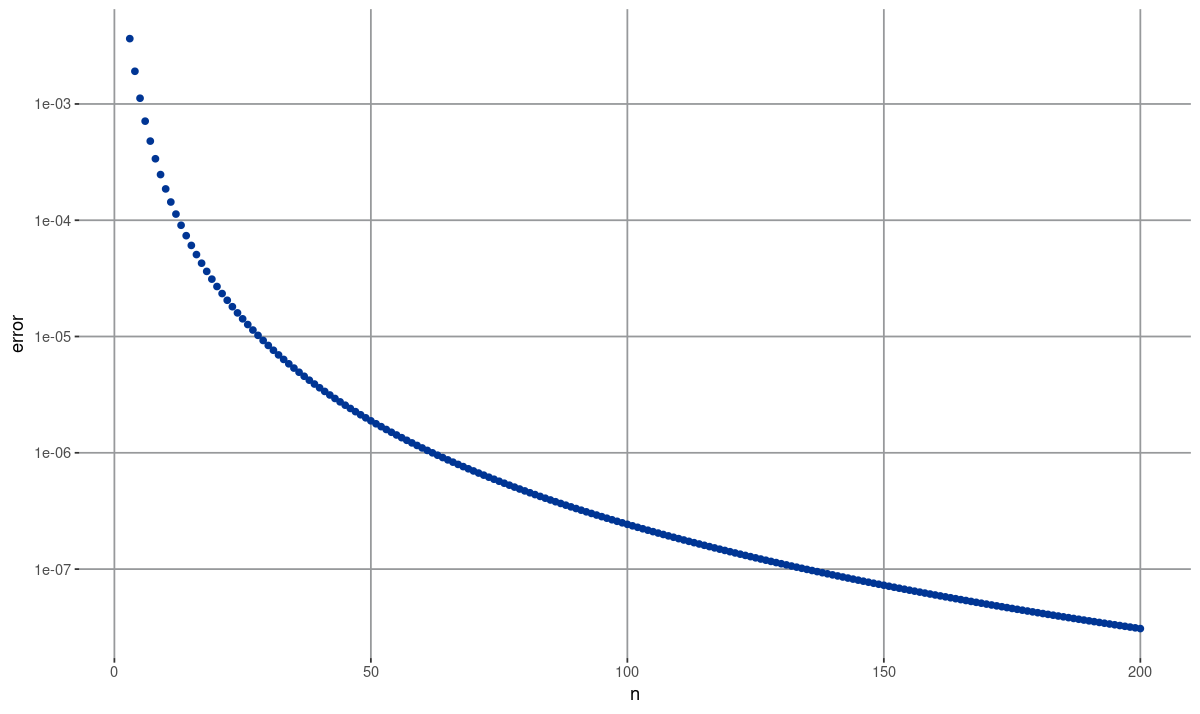

In [5]:
ggplot(data=nilamkanthatseq) +aes(x=n,y=error)+ pitt.theme+geom_point(color=Pitt.Blue) + scale_y_continuous(trans='log10')

In [6]:
# It's about machine error at 50,000 draws
nilakanthaPi(50000)
pi

[1] 3.141593

[1] 3.141593

### But suppose we didn't know this math sequence
If we have a good sense for what we need this particular number for, it's not too hard to begin using the Law of Large Numbers to brute force measure it via simulation. 

The question then is how to construct a random variable $X_n$ with the property that $\mathbb{E}X=\pi$.

But here we will deploy our sense for what $\pi$ is measuring, where we will think of the area of a circle. In that way, we will use the formula for a circle and an area of known volume to construct the random variable $X$

* In particular we will first draw a pair of initial random variables $(U_1,U_2)$, each drawn from the interval $[-1,1]$
* We'll then assess whether this pair live inside a circle of radius 1 centered at zero. $$\text{InCircle}(u_1,u_2):=u_1^2+u_2^2\leq 1$$

<table>
    <tr><td>
    <h3>Drawing from:</h3> </td><td><h3>Returns 1 if:</h3></td></tr>
    <tr><td>
    <img src=https://alistairjwilson.github.io/MQE_AW/i/PiCalc1.svg  alt="Original draw"></td><td>
    <img src=https://alistairjwilson.github.io/MQE_AW/i/PiCalc2.svg alt="Event definition"></td></tr>
</table>

**Question:** What is the chance that a random draw from the blue region $(U_1,U_2)$, lies in the yellow region?

Our random variable $X$ will therefore be a function of the pair of  uniform random variables:
$$ X=\begin{cases} 4 & \text{if }U_1^2+U_2^2\leq1\\ 0 & \text{otherwise}\end{cases} $$
where we know that $$\mathbb{E}X=\Pr\left\{\left(U_1,U_2\right)\text{ in circle}\right\}\cdot 4 + \Pr\left\{(U_1,U_2)\text{ not in circle}\right\}\cdot 0\\ =\frac{\pi 1^2}{2\times2}\cdot 4=\pi$$

So let's draw some values

In [61]:
#runif provides us with random uniform draws
u1<- runif(n=10000,min=-1,max=1) 
u2<- runif(n=10000,min=-1,max=1)
simData.pi<-data.frame("u1"=u1,"u2"=u2)
# Enter the binary outcome on whether they lie inside the circle
simData.pi["InCircle"]<-ifelse(  (simData.pi$u1**2+simData.pi$u2**2)<=1,4,0)
# take the average across this binary event!
head(simData.pi)
 

,u1,u2,InCircle
,<dbl>,<dbl>,<dbl>
1,-0.94570856,0.41669656,0
2,-0.72506405,-0.18701952,4
3,-0.79514499,-0.05645939,4
4,-0.53343822,0.53812873,4
5,-0.05879827,-0.38778376,4
6,-0.56035638,0.18637361,4


[1] 3.1292

Plotting it:

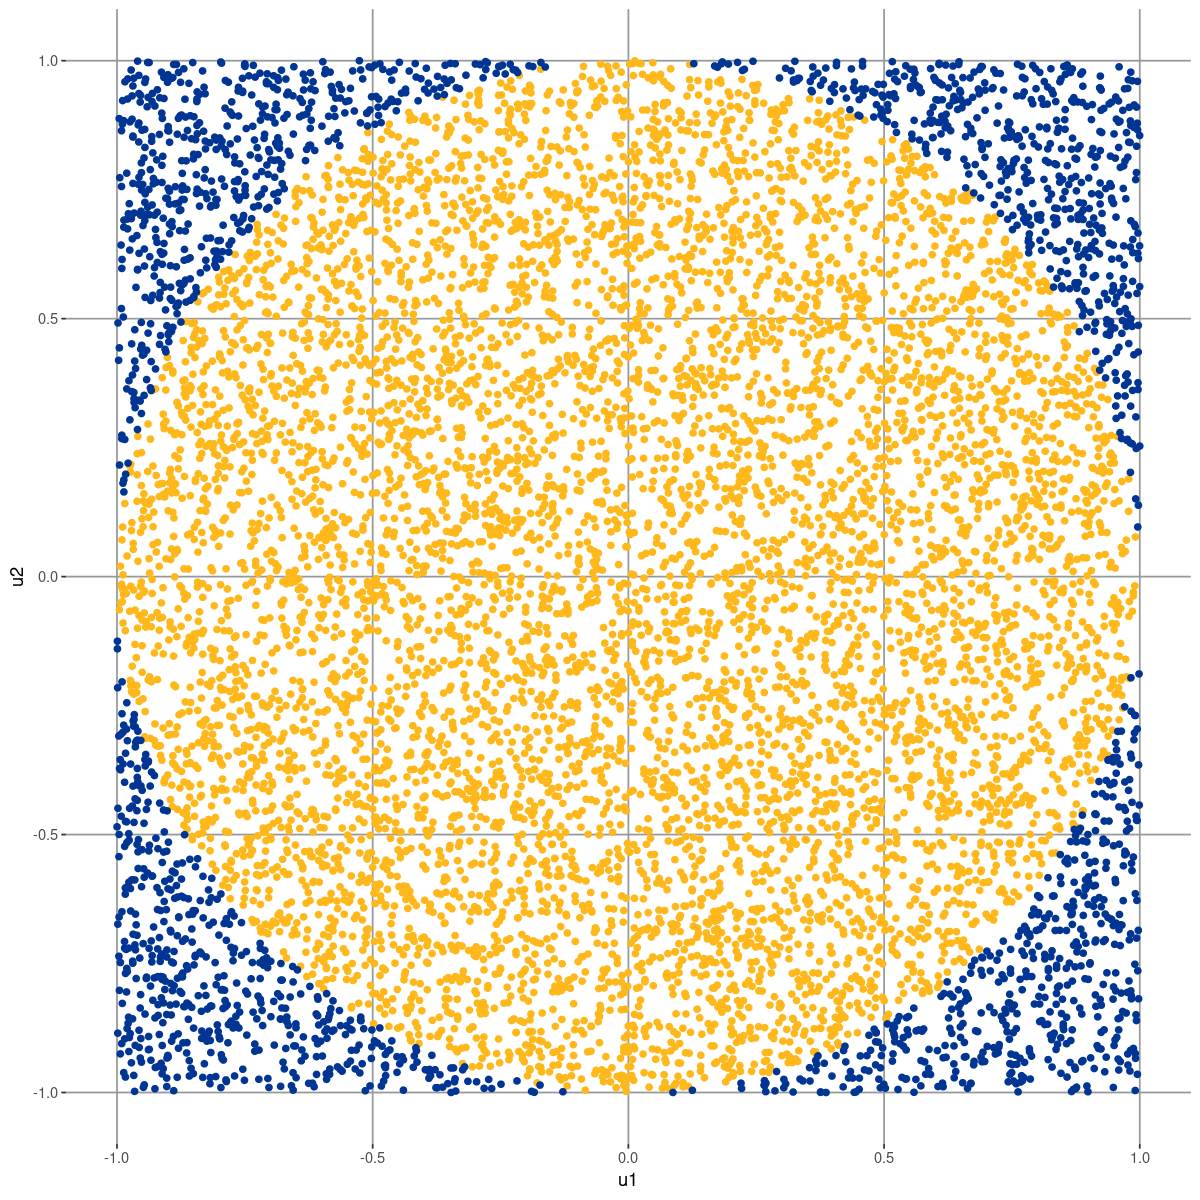

In [8]:
# Change the plot output to Jupyter to have constant aspect ratio
options(repr.plot.width=10, repr.plot.height=10)
ggplot() + pitt.theme+geom_point( data=subset(simData.pi,InCircle>0),aes(x=u1,y=u2),color=Pitt.Gold)+
geom_point( data=subset(simData.pi,InCircle==0),aes(x=u1,y=u2),color=Pitt.Blue)
# Set the output back to previous
options(repr.plot.width=10, repr.plot.height=10/1.68) 

Doing the same thing but where we only store the mean value via a function.

In [62]:
pi.sim<- function(n) mean( ifelse( (runif(n)**2 + runif(n)**2)<= 1,4,0) )
pi.sim.df<-data.frame(order=3:8) 
pi.sim.df["n"]<-10**pi.sim.df["order"]
#sapply is used to apply the list to the pi.sim function in turn,
# where the runif() term doesn't like being applied to a list!
pi.sim.df["pi"]<-sapply(pi.sim.df$n,pi.sim)

order,n,pi,error
<int>,<dbl>,<dbl>,<dbl>
3,1e+03,3.184000,0.0424073464
4,1e+04,3.107200,0.0343926536
5,1e+05,3.146560,0.0049673464
6,1e+06,3.140316,0.0012766536
7,1e+07,3.141204,0.0003882536
8,1e+08,3.141448,0.0001448936


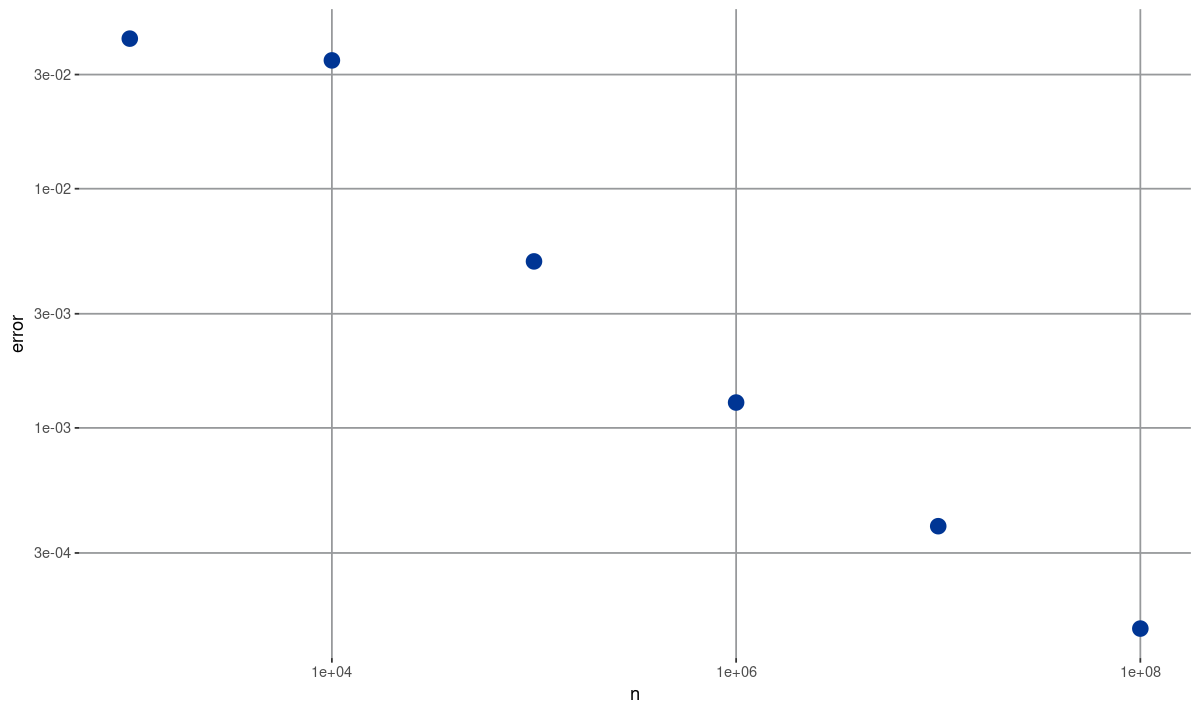

In [10]:
pi.sim.df["error"]<-abs(pi-pi.sim.df["pi"])
ggplot(data=pi.sim.df) +aes(x=n,y=error)+ pitt.theme+
geom_point(color=Pitt.Blue,size=4) + 
scale_x_continuous(trans='log10')+ scale_y_continuous(trans='log10')
pi.sim.df 

### So...
* It's obviously not as accurate as the more complex way of calculating it, but as an approximation, this is pretty good! 
* The benefit here was that we didn't need to be a first-order mathematician to construct a sequence that quickly converged, I just had to know what the constant I was after was measuring.
* That said, if you did know the mathematical formula, you'd be much quicker using it.

## Figuring out complex variables

There are many events we might want to have a good prediction about the likely chances, but where we know that it is a an aggregate of lots of other smaller events. Analytically, the permutations involved can often be overwhelming. In contrast, a particular realization may be relatively easy to simulate.

While it can therefore be *possible* to calculate something, you're likely better just simulating each of the components that we do have a better model of. Here we'll look at an example that was of recent prominence!

## Electoral College
Take the recent US presidential election. The winner is determined by the vote totals in each of the separate states, and where each state has a specific number of electoral colleges votes.

The event that we want to forecast is the likelihood that one candidate wins. Given this structure, and some way of simulating each of the component states, we can use simulation methods to understand the final result.

### Component parts
For this particular model then we need a  core (outer loop) procedure that  runs the model many times, storing the relevant variables so we can calculate things afterwards.

But inside each run of the election we need:
 * A parameterized random variable that draws an election outcome for each state
 * A function that takes outcomes for each state and produces a number of electoral college votes
 * A function that aggregates the electoral college votes into an outcome

#### Parameterized model
We could be more sophisticated here and think of a model that takes into account:
* Demographics
* Electoral spending
* Historical outcomes
* Common shocks (national good/bad news)

For now though we'll think about a much simpler model, that models each state independently, and we'll come back to integrate in a commmon shock

## Setting the parameters
Ideally, we would *estimate* the parameters of the model from data, which would also give us a sense for how far off we are. However, we haven't gotten to that point in the class (soon though!).

To roughly calibrate the parameters I'm going to instead use probability data from *The Economist* magazine's model (which is publicly available [here](https://github.com/TheEconomist/us-potus-model)).

Their model is more complicated, where it takes as inputs many other features, and allows for many other moving parts/nuance. However, we're going to start simple!

In [63]:
# Enter the data from the economist:
economist.Data<-read.csv('economist/state_averages_and_predictions_topline.csv')
# Enter the electoral votes for each state (I copied these from wikipedia!)
ev.Data<-read.csv('./ev.csv') 
# show the data frame heads
head(economist.Data ) 
head(ev.Data) 

,dem_average_low,dem_average_high,dem_average_mean,state,projected_vote_low,projected_vote_high,projected_vote_mean,projected_win_prob,date
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0.4213409,0.5069690,0.4640417,AK,0.4213409,0.5069690,0.4640417,0.0509250,11/3/2020
2,0.3613699,0.4421181,0.4014666,AL,0.3613699,0.4421181,0.4014666,0.0000000,11/3/2020
3,0.3430350,0.4290113,0.3853019,AR,0.3430350,0.4290113,0.3853019,0.0000000,11/3/2020
4,0.4729399,0.5520761,0.5123716,AZ,0.4729399,0.5520761,0.5123716,0.7315125,11/3/2020
5,0.6368820,0.7113031,0.6747757,CA,0.6368820,0.7113031,0.6747757,1.0000000,11/3/2020
6,0.5214608,0.6018235,0.5620393,CO,0.5214608,0.6018235,0.5620393,0.9986750,11/3/2020


,state,ev
,<chr>,<int>
1,AL,9
2,AK,3
3,AZ,11
4,AR,6
5,CA,55
6,CO,9


In [12]:
elecVotes<-ev.Data["ev"]
rownames(elecVotes) <- ev.Data$state

Checking the data, it's obvious that these are Democratic Candidate win probs, rather than Republican Candidate

In [64]:
stateProb<-economist.Data['projected_win_prob']
# set the row names to the states
rownames(stateProb) <- economist.Data$state
# rename the column
names(stateProb)<-"dem.Prob"
# Two-party model, so rep.Prob is
stateProb["rep.Prob"]<-1-stateProb["dem.Prob"]
head(stateProb) 
elecVotes <- ev.Data['ev']
rownames(elecVotes) <- ev.Data$state

,dem.Prob,rep.Prob
,<dbl>,<dbl>
AK,0.0509250,0.9490750
AL,0.0000000,1.0000000
AR,0.0000000,1.0000000
AZ,0.7315125,0.2684875
CA,1.0000000,0.0000000
CO,0.9986750,0.0013250


In [65]:
stateProb["ev"]<-1
for ( state in economist.Data$state) { 
    stateProb[state,"ev"]<-elecVotes[state,"ev"]
}

So we can now access all of our parameters as follows:

In [66]:
# Dem Probability in Alaska
stateProb["AK","dem.Prob"]
# Rep Probability in Arizona
stateProb["AZ","rep.Prob"]
# Electoral votes from California
stateProb["NY","ev"]

[1] 0.050925

[1] 0.2684875

[1] 29

Also, will be helpful to define the list of states

In [67]:
stateList<-rownames(stateProb)
stateList

[1] "AK" "AL" "AR" "AZ" "CA" "CO" "CT" "DC" "DE" "FL" "GA" "HI" "IA" "ID" "IL"
[16] "IN" "KS" "KY" "LA" "MA" "MD" "ME" "MI" "MN" "MO" "MS" "MT" "NC" "ND" "NE"
[31] "NH" "NJ" "NM" "NV" "NY" "OH" "OK" "OR" "PA" "RI" "SC" "SD" "TN" "TX" "UT"
[46] "VA" "VT" "WA" "WI" "WV" "WY"

### Running the simulation
Set the simulation size:

In [68]:
n.sims<-10000

Now we need to write a function that draws an outcome for each state as a single repetition of the sample

Let's carefully go through what this function does

In [69]:
stateDraw<- function(probList,evList){
    # This is 51 uniform random numbers in[0,1]
    # which we will use to create the realization
    rnd<-runif(51,min=0,max=1)
    # initialize the out vector for ease of putting it together
    out=c(1:53)
    # Determine outcome for each of the 51
    for (ii in 1:51) {
        # if the model rnd number is less than the model prob then output the electoral votes, 
        # otherwise zero
        out[ii]<- ifelse(  rnd[ii] < probList[ii]  , evList[ii] ,  0 )
    }
    # sum the electoral vites
    demev<-sum(out[1:51])
    # name the output vector
    names(out)<-c(stateList,"dem.Total","rep.Total")
    # assign vote totals to the last two locations
    out["dem.Total"]<-demev
    out["rep.Total"]<- (538- demev)
    out
}

So let's run the function once and check it's output.

**Question:** What are we expecting it to look like?

In [70]:
stateDraw( stateProb$dem.Prob ,stateProb$ev ) 

AK        AL        AR        AZ        CA        CO        CT        DC 
        0         0         0        11        55         9         7         3 
       DE        FL        GA        HI        IA        ID        IL        IN 
        3        29         0         4         0         0        20         0 
       KS        KY        LA        MA        MD        ME        MI        MN 
        0         0         0        11        10         4        16        10 
       MO        MS        MT        NC        ND        NE        NH        NJ 
        0         0         0        15         0         0         4        14 
       NM        NV        NY        OH        OK        OR        PA        RI 
        5         6        29        18         0         7        20         4 
       SC        SD        TN        TX        UT        VA        VT        WA 
        0         0         0        38         0        13         3        12 
       WI        WV        WY dem.Total rep.Total 
       10         0         0       390       148

### Repeating
So if we're happy with it, we can move on to simulating it **lots** of times.

In [71]:
n.sims <- 500000
outputMatrix <- matrix(1,nrow=n.sims, ncol=53)
for (rep in 1:n.sims) {
    outputMatrix[rep,] <- stateDraw(stateProb$dem.Prob,stateProb$ev)
}
outSim.Economist<-data.frame(outputMatrix)
names(outSim.Economist) <- c(stateList,"dem.Total","rep.Total")
head(outSim.Economist)
# we'll later define a function to do this more generally

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,⋯,TX,UT,VA,VT,WA,WI,WV,WY,dem.Total,rep.Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,350,188
2,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,358,180
3,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,334,204
4,0,0,0,11,55,9,7,3,3,29,⋯,38,0,13,3,12,10,0,0,378,160
5,0,0,0,0,55,9,7,3,3,0,⋯,0,0,13,3,12,10,0,0,301,237
6,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,335,203


### Outcomes
So now that we have the simulation run, let's calculate the resulting outcome. There are **538** total electoral votes, so we'll check the fraction of times the Democrats get enough votes to win outright

In [74]:
mean(ifelse(outSim.Economist$dem.Total>538/2,1,0))

[1] 0.999744

and the complementary probability for the Republicans to win or draw:

In [75]:
mean(ifelse(outSim.Economist$dem.Total<538/2,1,0))

[1] 0.000228

This seems a little high. One  problem here is that we're not accounting for the correlations.

The economist data actually includes their estimated correlation matrix:

In [23]:
inMatrix<-read.csv('./economist/state_correlation_matrix.csv')
stateCorrMatrix<-as.matrix(inMatrix[1:51,2:52])
rownames(stateCorrMatrix)<-inMatrix$state
stateCorrMatrix[c("PA","AZ","GA","MI","FL"),c("PA","AZ","GA","MI","FL")]

,PA,AZ,GA,MI,FL
PA,1.0000,0.5754,0.4656,0.8694,0.7254
AZ,0.5754,1.0000,0.2733,0.5343,0.6296
GA,0.4656,0.2733,1.0000,0.5465,0.3904
MI,0.8694,0.5343,0.5465,1.0000,0.6779
FL,0.7254,0.6296,0.3904,0.6779,1.0000


**Question:** How can we generate the analog to this from our simulation?

In [76]:
head(outSim.Economist) # c("PA","AZ","GA","MI","FL")
#code_to_calculate_correlations
cor(outSim.Economist[,c("PA","AZ","GA","MI","FL")])

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,⋯,TX,UT,VA,VT,WA,WI,WV,WY,dem.Total,rep.Total
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,350,188
2,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,358,180
3,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,334,204
4,0,0,0,11,55,9,7,3,3,29,⋯,38,0,13,3,12,10,0,0,378,160
5,0,0,0,0,55,9,7,3,3,0,⋯,0,0,13,3,12,10,0,0,301,237
6,0,0,0,11,55,9,7,3,3,29,⋯,0,0,13,3,12,10,0,0,335,203


,PA,AZ,GA,MI,FL
PA,1.0000000000,0.0008303344,0.0004386752,-0.0009272845,0.0002115771
AZ,0.0008303344,1.0000000000,0.0002492957,-0.0009973281,-0.0013424742
GA,0.0004386752,0.0002492957,1.0000000000,0.0006611802,0.0014543157
MI,-0.0009272845,-0.0009973281,0.0006611802,1.0000000000,0.0001838117
FL,0.0002115771,-0.0013424742,0.0014543157,0.0001838117,1.0000000000


### Adding common shocks
While we could go back to their primitive model to play with where these correlations come from, we're going just do something quick and dirty to put in *some* correlation via common shocks.

I'm going to use a parametric model for generating the state win probabilities:
$$ \Pr(\text{State }j\text{ is Dem})=\frac{\exp(\alpha_j+\epsilon)}{\exp(\alpha_j+\epsilon)+1}$$
where $\epsilon$ is a common $U[-k,k]$ shock and $\alpha_j$ is a state-level parameter. 

$$ \Pr(\text{State }j\text{ is Dem})=\frac{\exp(\alpha_j+\epsilon)}{\exp(\alpha_j+\epsilon)+1}$$
**Question:** What does the shock do to the probability?

**Question:** Why use the function $\tfrac{\exp(x)}{\exp(x)+1}$?

### Illustrating the function

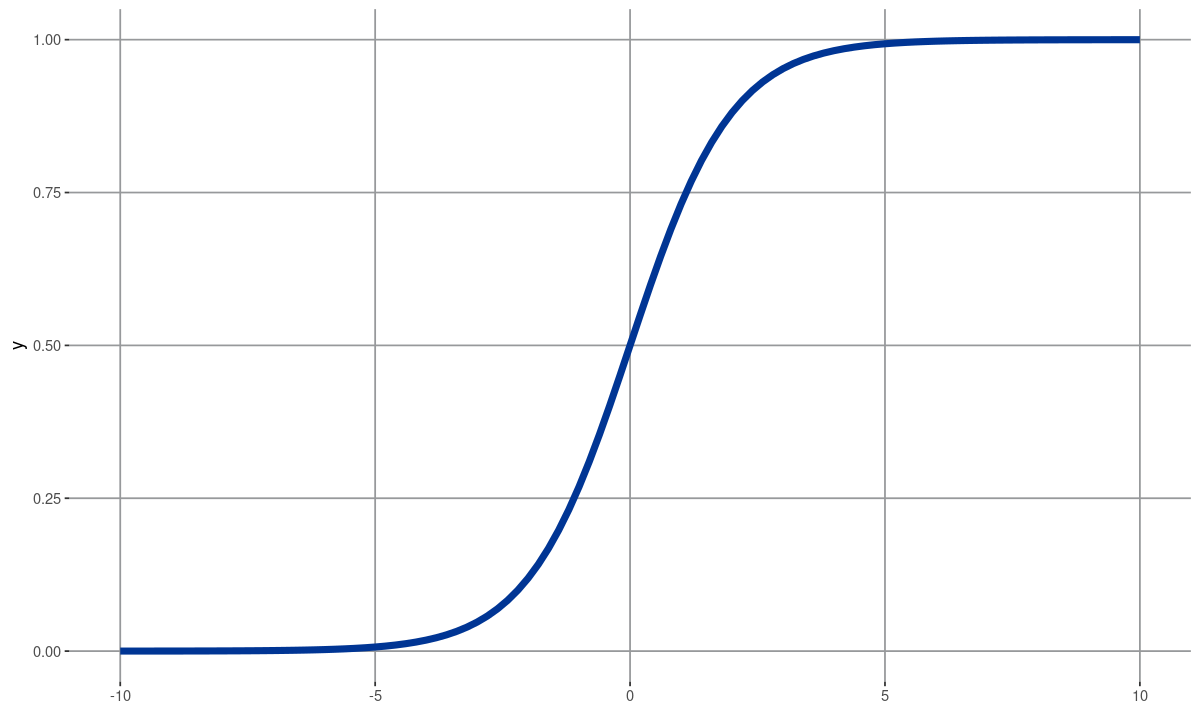

In [25]:
expProb<-function(x) exp(x)/(exp(x)+1) 
base+geom_function(fun = expProb, colour=Pitt.Blue, linewidth=2)+xlim(-10,10)

So this is just a way of mapping a real-valued number in $\mathbb{R}$ into a probability in $[0,1]$, where lower numbers indicate lower probabilities.

### Where to get the $\alpha_j$ parameters?
In order to calculate the new parameters from the original probabilities, I integrated the formula across a uniform shock in $[-k,k]$ to set the unconditional probability equal to the value from the Economist data $p_j$:  
$$\mathbb{E}P_j=\int^k_{-k} \frac{1}{2k} \frac{\exp(\alpha_j+\epsilon)}{\exp(\alpha_j+\epsilon)+1} d\epsilon=p_j.$$

I then inverted this formula to figure out the how to map the given probability $p_j$ for each state $j$ into a parameter $\alpha_j$ for the model *(don't worry about this step, this is just so I can use the Economist probability data).*

This lead to the below function:

In [77]:
gen.alpha<- function(p,k) {
    if (p <= 0.0001) { # This makes sure we don't output -infinity
        return (-10)
    }
    else if (p>=0.9999) { # This make sures we don't output +infinity
        return (10)
    } 
    else { # Standard output for the economist probability!
        return (k+ log(( exp(2*p*k)-1))-log((exp(2*k) -exp(2*k*p) )) )
    }
}

In order to check this function works, we'll make use a quick ***simulation*** to check it!

In [79]:
gen.alpha(0.99,2)

[1] 5.179562

In [80]:
# calculate the parameters 
alpha.0.1 <- gen.alpha(0.1,2) 
alpha.0.8 <- gen.alpha(0.8,4) 
# draw 10000 shocks from the uniform on [-1,1] 
shock<-runif(1000000,min=-1,max=1)
# Calculate the mean for p=0.1 with a [-2,2] shock
alpha.0.1
mean(exp(alpha.0.8+shock*4)/(exp(alpha.0.8+shock*4)+1))


[1] -2.681929

[1] 0.800416

So looks like my formula was at least correct for these values. That is, I've checked that the marginal probabilities for each state match will match the probabilities we read in from *The Economist* model

Now let's check that the model's doing what we want in creating some variation in the probabilities across different shocks.

In [82]:
#Interquartile range p=0.1, k=2/2:
IQR(exp(alpha.0.1+2*shock)/(exp(alpha.0.1+2*shock)+1))
IQR(exp(alpha.0.1+4*shock)/(exp(alpha.0.1+4*shock)+1))
#Interquartile range p=0.8, k=2/4:
IQR(exp(alpha.0.8+4*shock)/(exp(alpha.0.8+4*shock)+1))
IQR(exp(alpha.0.8+4*shock)/(exp(alpha.0.8+4*shock)+1))

[1] 0.1324174

[1] 0.3272181

[1] 0.3383907

[1] 0.3383907

**Question:** What else could I run here to check that it generates variation in the probabilities? 

In [30]:
quantile(exp(alpha.0.1+2*shock)/(exp(alpha.0.1+2*shock)+1),c(0.1,0.9))

10%        90% 
0.01361544 0.25335206

In [31]:
quantile(exp(alpha.0.1+2*shock)/(exp(alpha.0.1+2*shock)+1), probs=c(0.25,0.5,0.75))

25%        50%        75% 
0.02458398 0.06404273 0.15697555

So as we make $k$ larger, the range in probabilities shifts.

### Figure out the parameter for each state:
Using the formula above, we can calculate the $\alpha$ parameter for each state:

In [83]:
# Enter the alpha parameter for each state
kVal <- 5
stateProb["alpha"]<-0 
for (state in stateList) {
    stateProb[state,"alpha"]=gen.alpha(stateProb[state,"dem.Prob"],kVal)
    }
head(stateProb)
stateProb["NY",]

,dem.Prob,rep.Prob,ev,alpha
,<dbl>,<dbl>,<dbl>,<dbl>
AK,0.0509250,0.9490750,3,-5.409333
AL,0.0000000,1.0000000,9,-10.000000
AR,0.0000000,1.0000000,6,-10.000000
AZ,0.7315125,0.2684875,11,2.385128
CA,1.0000000,0.0000000,55,10.000000
CO,0.9986750,0.0013250,9,9.317079


,dem.Prob,rep.Prob,ev,alpha
,<dbl>,<dbl>,<dbl>,<dbl>
NY,1,0,29,10


### Re-simulate the model with common shocks
While the shock $\epsilon$ is mean-zero and random *across* simulations, I'm going to make it common to each state *within* each simulation.

In this way if the shock is very negative it will decrease/increase the chances for a Democratic/Republican win in each state.

Let's write a function to carry out the simulation:

In [84]:
stateDrawC<- function( alphaList , evList, kparam) {
    eps<-runif(1,min=-kparam,max=kparam) # the common shock draw
    rnd<-runif(51,min=0,max=1) # This is 51 uniform random numbers in [0,1] to determine outcome
    
    out=c(1:54) #initialize the out vector as 53 values
    # Determine outcome for each of the 51 electoral regions
    for (ii in 1:51) {
        # if the model rnd number is less than the model prob (the exp/(exp+1) term) then output the electoral votes, otherwise zero
        out[ii]<-ifelse( rnd[ii] < exp( alphaList[ii]+eps) /( exp( alphaList[ii]+eps )+1), evList[ii] ,0)
        # Here I adjust for the way that Maine distributes it's electoral votes by just splitting them every time
        if (ii==22) out[ii]=2
    }
    demev<-sum(out[1:51]) # sum of the electoral votes
    names(out)<-c(stateList,"dem.Total","rep.Total","shock") # name the out vector
    out["dem.Total"]<-demev # assign the 52nd entry to the democratic total
    out["rep.Total"]<- (538- demev) # assign the 53nd entry to the republican total
    out["shock"]<-eps
    out # this is the returned output
}
# Run it once to see the output!
stateDrawC(stateProb$alpha,stateProb$ev,kVal)

AK         AL         AR         AZ         CA         CO         CT 
  3.000000   0.000000   0.000000  11.000000  55.000000   9.000000   7.000000 
        DC         DE         FL         GA         HI         IA         ID 
  3.000000   3.000000  29.000000  16.000000   4.000000   6.000000   0.000000 
        IL         IN         KS         KY         LA         MA         MD 
 20.000000   0.000000   0.000000   0.000000   0.000000  11.000000  10.000000 
        ME         MI         MN         MO         MS         MT         NC 
  2.000000  16.000000  10.000000   0.000000   0.000000   0.000000  15.000000 
        ND         NE         NH         NJ         NM         NV         NY 
  0.000000   0.000000   4.000000  14.000000   5.000000   6.000000  29.000000 
        OH         OK         OR         PA         RI         SC         SD 
 18.000000   0.000000   7.000000  20.000000   4.000000   0.000000   0.000000 
        TN         TX         UT         VA         VT         WA         WI 
  0.000000  38.000000   0.000000  13.000000   3.000000  12.000000  10.000000 
        WV         WY  dem.Total  rep.Total      shock 
  0.000000   0.000000 413.000000 125.000000   3.539587

### Run the new simulation:
So now we just repeat the simulation again.

However, because we're spending so much time writing code to add repetitions to a matrix and convert to a data frame, let's write it as a function!

In [85]:
monte.carlo.sim<-function(fun,fun.arg,nSims=100000){
    # this line just runs fun(arguments in fun.arg list) so if fun.arg=(x,y,z) do.call(fun,fun.arg) runs fun(x,y,z)
    rep1<- do.call(fun,fun.arg) 
    # Set the dimensions for the output matrix
    nc<-length(rep1)
    lbl<-names(rep1)
    outputMatrix <- matrix(1,nrow=nSims, ncol=nc)
    outputMatrix[1, ]<-rep1 # write the sim to the first line
    for (rep in 2:nSims) { # for each of the remaining sims, add them in
        outputMatrix[rep, ] <- do.call(fun,fun.arg)
    }
    df<-data.frame(outputMatrix) # convert it to a data frame
    names(df)<-lbl  # get the names from the simulation output lbl
    return(df) # return the data frame as the output
}

So we don't have to run this code anymore:
```
outputMatrix <- matrix(1,nrow=n.sims, ncol=54) # Nsims x 54 matrix of ones
for (rep in 1:n.sims) { 
    outputMatrix[rep,] <- stateDrawC(stateProb$alpha,stateProb$ev,kVal)
}
outSim.Economist.Corr<-data.frame(outputMatrix) 
names(outSim.Economist.Corr) <- c(stateList,"dem.Total","rep.Total","shock") 
```

Running the sim:

In [87]:
outSim.Economist.Corr <- monte.carlo.sim( #calling our simulation function
    stateDrawC, # the function to simulate
    nSims=100000, # number of times to simulate
    fun.arg=list(alphaList=stateProb$alpha,evList=stateProb$ev,kparam=8) #arguments to the function
)
head(outSim.Economist.Corr)
# Average win probability for Dems in the simulation:
mean(ifelse(outSim.Economist.Corr$dem.Total>538/2,1,0))

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,⋯,UT,VA,VT,WA,WI,WV,WY,dem.Total,rep.Total,shock
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,0,0,11,55,9,7,3,3,29,⋯,0,13,3,12,10,0,0,422,116,6.6128341
2,0,0,0,11,55,9,7,3,3,0,⋯,0,13,3,12,10,0,0,288,250,-2.6537742
3,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,0,0,0,206,332,-7.2057520
4,0,0,0,11,55,9,7,3,3,29,⋯,0,13,3,12,10,0,0,372,166,1.0127819
5,0,0,0,11,55,9,7,3,3,29,⋯,0,13,3,12,10,0,0,332,206,-0.8524877
6,3,0,0,11,55,9,7,3,3,29,⋯,0,13,3,12,10,5,0,428,110,6.9132279


[1] 0.79573

So not a huge difference on average, despite really quite large shocks. Let's make sure that the shock is doing what it's meant to.

Here I'm going to plot a smoothed version of the conditional mean number of electoral votes for the democrats with the shock:

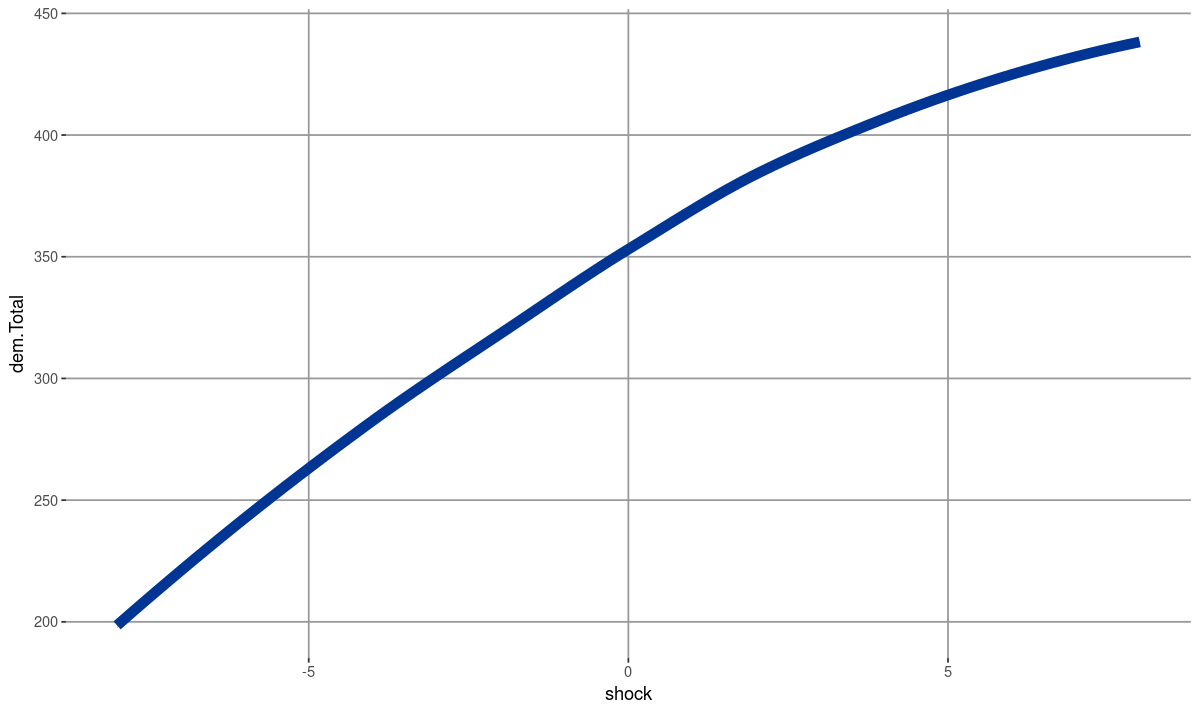

In [36]:
ggplot(data=outSim.Economist.Corr) +aes(x=shock,y=dem.Total)+ 
pitt.theme+geom_smooth(color=Pitt.Blue,linewidth=3,method="loess",formula="y~x")

So even with fairly large shocks our model still suggests that it was likely that the Democrats would win the election. The economist model is instead built on other fundamentals within each state, as such it has quite a different correlation structure.

Let's examine five key swing states: PA, AZ, GA, MI, FL to look at the correlations

In [37]:
# Original Independent Prob Model 
round( cor(outSim.Economist[c("PA","AZ","GA","MI","FL")]),3 )
# Common Shock Prob Model
round( cor(outSim.Economist.Corr[c("PA","AZ","GA","MI","FL")]),3 )
# Economist Model
stateCorrMatrix[c("PA","AZ","GA","MI","FL"),c("PA","AZ","GA","MI","FL")]

,PA,AZ,GA,MI,FL
PA,1.000,-0.002,0.000,-0.002,0.002
AZ,-0.002,1.000,-0.001,-0.001,0.000
GA,0.000,-0.001,1.000,-0.002,0.000
MI,-0.002,-0.001,-0.002,1.000,0.001
FL,0.002,0.000,0.000,0.001,1.000


,PA,AZ,GA,MI,FL
PA,1.000,0.550,0.488,0.489,0.596
AZ,0.550,1.000,0.703,0.412,0.710
GA,0.488,0.703,1.000,0.351,0.667
MI,0.489,0.412,0.351,1.000,0.445
FL,0.596,0.710,0.667,0.445,1.000


,PA,AZ,GA,MI,FL
PA,1.0000,0.5754,0.4656,0.8694,0.7254
AZ,0.5754,1.0000,0.2733,0.5343,0.6296
GA,0.4656,0.2733,1.0000,0.5465,0.3904
MI,0.8694,0.5343,0.5465,1.0000,0.6779
FL,0.7254,0.6296,0.3904,0.6779,1.0000


Our correlations certainly are not close to *The Economist* model correlations. However, we're fairly close to the model's predictions on the [probability of a Democratic win](https://projects.economist.com/us-2020-forecast/president): 97 % if we set $k=3$

In [88]:
kVal <- 3.31
stateProb["alpha"]<-0
for (state in stateList) {
    stateProb[state,"alpha"]=gen.alpha(stateProb[state,"dem.Prob"],kVal)
    }
# initialize the matrix we're going to fill in
outSim.Economist.Corr <- monte.carlo.sim( #calling our simulation function
    stateDrawC, # the function to simulate
    nSims=100000, # number of times to simulate
    fun.arg=list(alphaList=stateProb$alpha,evList=stateProb$ev,kparam=kVal) #arguments to the function
)
# Average win probability for Dems in the simulation:
mean(ifelse(outSim.Economist.Corr$dem.Total>538/2,1,0))

[1] 0.97122

### Let's make the model more competitive
I wouldn't be entirely satisfied with the above model, as I think the chances for a Democratic win seem very high, though maybe this is a function of the Economist data we uses as an input.

However, to show you how we can use such a model once we have it let's play with the underlying numbers

Let's shift the alpha parameters for the model:
$$ \Pr(\text{State }j\text{ is Dem})=\frac{\exp(\alpha_j+\epsilon)}{\exp(\alpha_j+\epsilon)+1}$$

In [89]:
# Generate a new version of alpha for all the states
stateProb["alpha.comp"]<-stateProb["alpha"]-4

**Question:** What will this shift do?

The above simply pushes all of the state parameters to the left (funnily enough, having the opposite effect on outcomes)

In [90]:
outSim.Comp.Corr<-monte.carlo.sim(
    stateDrawC,nSims=50000, 
    fun.arg=list(alphaList=stateProb$alpha.comp,evList=stateProb$ev,kparam=kVal)  
) 
head(outSim.Comp.Corr)
# Average win probability for Dems in the simulation:
mean(ifelse(outSim.Comp.Corr$dem.Total>538/2,1,0))
print(paste0("Probability dem win:", round(mean(ifelse(outSim.Comp.Corr$dem.Total>538/2,1,0)),3)))

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,⋯,UT,VA,VT,WA,WI,WV,WY,dem.Total,rep.Total,shock
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,10,0,0,277,261,1.5806718
2,0,0,0,11,55,9,7,3,3,0,⋯,0,13,3,12,10,0,0,288,250,1.8690069
3,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,0,0,0,211,327,-2.0549809
4,0,0,0,11,55,9,7,3,3,29,⋯,0,13,3,12,0,0,0,307,231,1.5528736
5,0,0,0,11,55,9,7,3,3,29,⋯,0,13,3,12,10,0,0,338,200,2.9556628
6,0,0,0,0,55,9,7,3,3,29,⋯,0,13,3,12,10,0,0,302,236,0.8092619


[1] 0.46572

[1] "Probability dem win:0.466"


So we've set-up more of a toss-up election, by modifying the parameters.

Let's look at what the win probabilities are by state in the model:

In [91]:
ProbVector<-1:51 
names(ProbVector)<-stateList 
for (state in stateList) {
   ProbVector[state]=round(mean(outSim.Comp.Corr[,state])/stateProb[state,"ev"],2)
}
ProbVector

AK   AL   AR   AZ   CA   CO   CT   DC   DE   FL   GA   HI   IA   ID   IL   IN 
0.00 0.00 0.00 0.20 0.99 0.94 0.99 0.99 0.99 0.27 0.10 0.99 0.05 0.00 0.99 0.00 
  KS   KY   LA   MA   MD   ME   MI   MN   MO   MS   MT   NC   ND   NE   NH   NJ 
0.00 0.00 0.00 0.99 0.99 0.50 0.70 0.76 0.00 0.00 0.00 0.17 0.00 0.00 0.72 0.99 
  NM   NV   NY   OH   OK   OR   PA   RI   SC   SD   TN   TX   UT   VA   VT   WA 
0.91 0.53 0.99 0.04 0.00 0.99 0.52 0.99 0.00 0.00 0.00 0.02 0.00 0.90 0.99 0.99 
  WI   WV   WY 
0.68 0.00 0.00

Seems reasonable enough. Now we have have a competitive parameterization, let's see what happens as we change things...

### The counter-factual
Normally, once we have a working model, the point is then to use it to figure out *what might be*.

In this case, we're going to try and work out what the effects are for the Republican candidate from Texas becoming a lean-Democratic state.

So, let's look at the current value of the $\alpha$ parameter for Texas, as a strongly lean R state. 

In [92]:
stateProb["TX","alpha.comp"]

[1] -5.438583

To try and understand the effects within the electoral college from the migration patterns in Texas, we will change Texas to a lean-D state.

**Question:** How can we do this?

In [93]:
# But what happens when we make TX a safe dem seat holding everything else as more competitive
stateProb["TX","alpha.comp"]<- 2.5
outSim.Comp.Corr<-monte.carlo.sim(stateDrawC,nSims=50000, 
        fun.arg=list(alphaList=stateProb$alpha.comp,evList=stateProb$ev,kparam=kVal))
head(outSim.Comp.Corr)
# Average win probability for Dems in the simulation:
mean(ifelse(outSim.Comp.Corr$dem.Total>538/2,1,0))
print(paste0("Probability dem win:", round(mean(ifelse(outSim.Comp.Corr$dem.Total>538/2,1,0)),2)))

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,⋯,UT,VA,VT,WA,WI,WV,WY,dem.Total,rep.Total,shock
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,10,0,0,299,239,-0.002236392
2,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,0,0,0,232,306,-2.297436425
3,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,0,0,0,245,293,-1.828777234
4,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,0,0,0,237,301,-2.842773231
5,0,0,0,0,55,9,7,3,3,29,⋯,0,13,3,12,10,0,0,333,205,1.641584798
6,0,0,0,0,55,9,7,3,3,0,⋯,0,13,3,12,0,0,0,269,269,-1.292532477


[1] 0.68664

[1] "Probability dem win:0.69"


So Texas represents only 7 percent of the electoral votes:

In [94]:
100*stateProb["TX","ev"]/538

[1] 7.063197

But the model is telling us that flipping it lean-D causes a shift in the probabilites of 20 percentage points, signaling that the paths to victory within the electoral college becomes much harder without this big state.

**Question:** How can I check the model probability of a Republicans winning without winning Texas?

In [45]:
#what_to_enter

## Simulating an econometric method
Another setting where we frequently want to know both expected values, but also distributions, is in trying to understand the properties of econometric models.

In particular, while asymptotic results mean that we can use $t$ and $F$ tests for parameters in OLS models, unless the disturbances are normally distributed, these tests are not appropriate for finite samples

**But when can we treat the data as if it is "large"**

Simulations offer us a way to examine finite-sample properties of a procedure... 


...or for more newer/more-experimental methods, they can help us understand whether the method is well formed under the relevant assumptions

### Linear Model Example

In [95]:
simLinearModel<-function(n,beta0=1,beta1=1,sigmaX=1,sigmaU=1){
  # Draw the x values 
  xD=rnorm(n,mean=0,sd=sigmaX)
  # Draw the u values from a very Non-Normal distribution
  uD=(rbeta(n,shape1=0.5,shape2=0.5,)-1)*sigmaU*sqrt(8)
  # Put them both into a dataset (y,x,u) 
  # where y=b0+b1*x+u
  simdata.d<-data.frame(y=beta0+beta1*xD+uD,x=xD,u=uD)
  # Estimate the model
  simdata.m<-lm(y~x,data=simdata.d)
  #Return the model as the output of the function
  return(coefficients(summary(simdata.m))["x",c("Estimate","Std. Error")])
}

### Run the model once to check

In [100]:
simLinearModel(50)

Estimate Std. Error 
 1.0614453  0.1416466

### Simulation with 25 observations per LM

In [101]:
sim.df.25<-monte.carlo.sim (
    simLinearModel,
    fun.arg=list(n=25),nSims=50000)
head(sim.df.25)  

,Estimate,Std. Error
,<dbl>,<dbl>
1,1.0051688,0.2058550
2,0.8338065,0.1977060
3,0.6293761,0.1832735
4,0.7807665,0.2238264
5,0.9222484,0.1576873
6,0.9294083,0.3347133


In [102]:
mean(sim.df.25$Estimate)

[1] 1.000611

In [105]:
sd(sim.df.25$Estimate)
1/sqrt(25-2)

[1] 0.212766

[1] 0.2085144

### Simulation with 100 observations per LM

In [104]:
sim.df.100<-monte.carlo.sim(simLinearModel,fun.arg=list(n=100),nSims=10000)
head(sim.df.100) 

,Estimate,Std. Error
,<dbl>,<dbl>
1,1.0037700,0.08925112
2,1.0643889,0.10354847
3,0.8515606,0.09835450
4,1.0687887,0.08798248
5,0.9822273,0.09816607
6,0.9458251,0.09841646


## Let's look at the distribution of the $\beta_1$ estimate

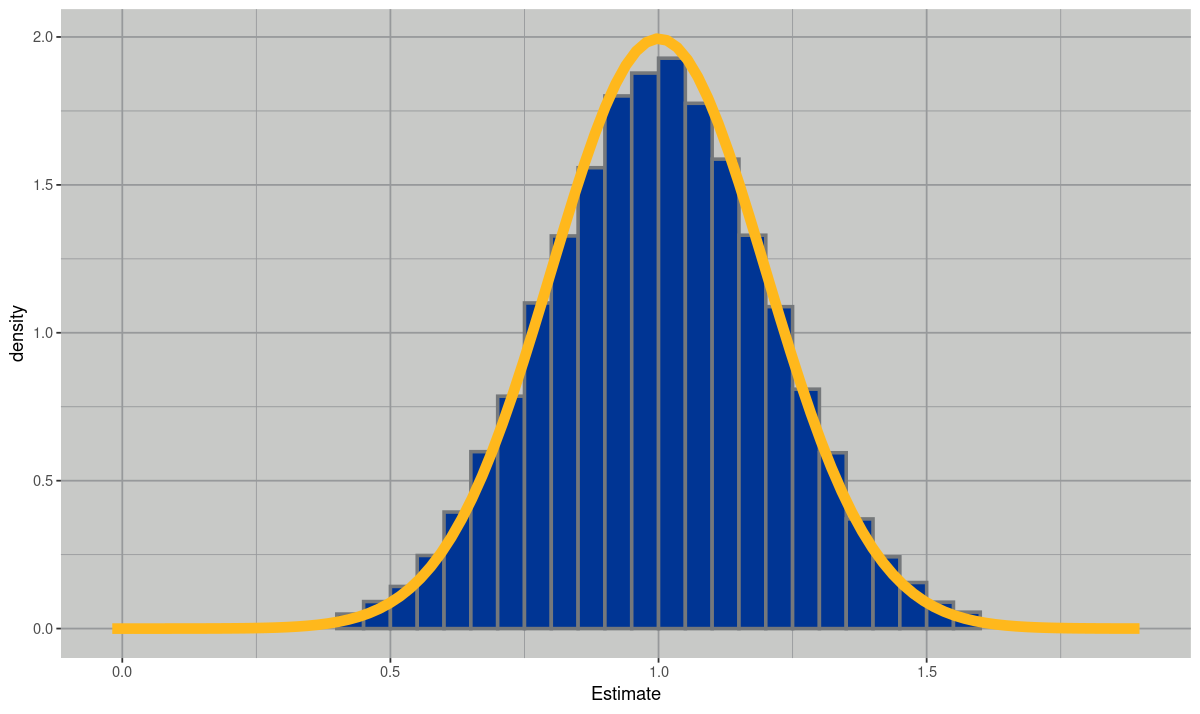

In [106]:
ggplot(sim.df.25, aes(x = Estimate))+
geom_histogram(aes(y =..density..),breaks = seq(0.4, 1.6, by = 0.05), 
                   colour = Pitt.DGray, 
                   fill = Pitt.Blue,size=1)+
geom_function(fun = dnorm, args = list(mean = 1, sd = 1/5),color=Pitt.Gold,linewidth =3)+theme( 
    panel.background = element_rect(fill = Pitt.LGray, linewidth = 0.5, linetype = "solid"),
  panel.grid.major = element_line(linewidth=  0.5, linetype = 'solid', colour =Pitt.Gray), 
  panel.grid.minor = element_line(linewidth= 0.25, linetype = 'solid', colour = Pitt.Gray)
  )

## t-statistic distribution
The true value of the parameter $\beta_1$ is 1, so we should be able to look at a t-statistic for the null:
$$ H_0:\beta_1=1$$
which is given by:
$$ \frac{\hat{\beta}-1}{\text{se}(\hat{\beta}_1)} $$

In [107]:
sim.df.25["tStat1"]<- (sim.df.25["Estimate"]-1 ) /sim.df.25["Std. Error"]

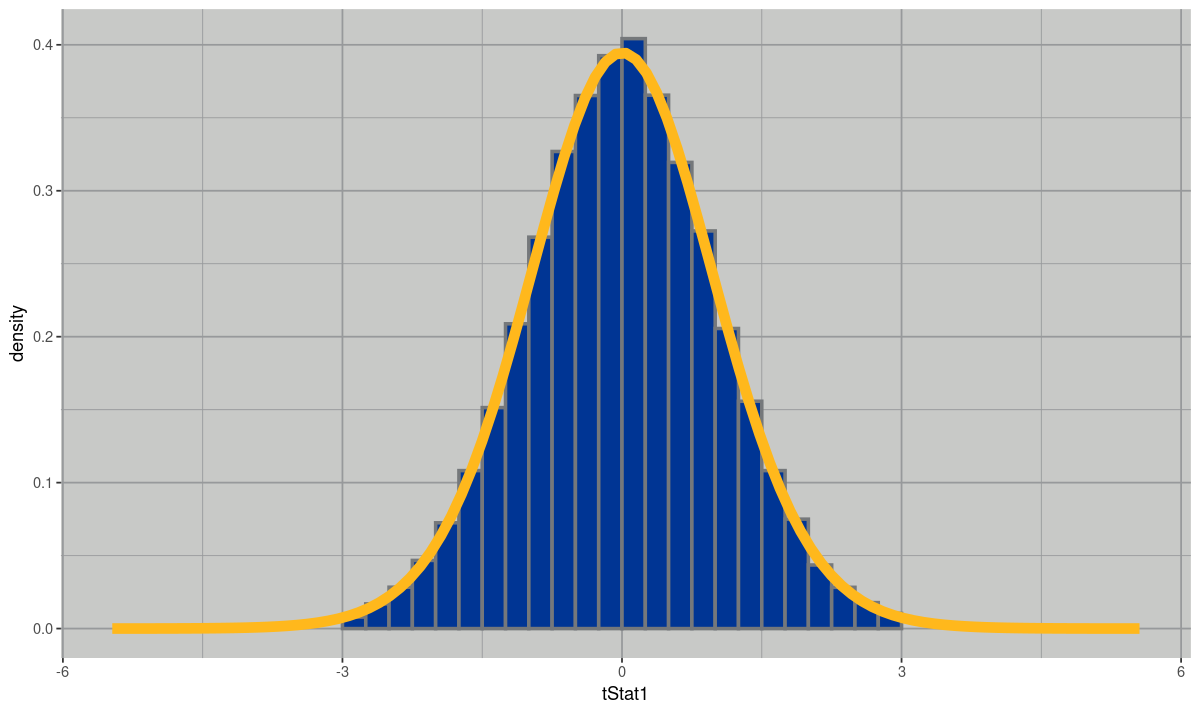

In [108]:
ggplot(sim.df.25, aes(x = tStat1))+
geom_histogram(aes(y =..density..),breaks = seq(-3, 3, by = 0.25), 
                   colour = Pitt.DGray, 
                   fill = Pitt.Blue,size=1)+
geom_function(fun = dt, args = list(df = 23),color=Pitt.Gold,linewidth = 3)+theme( 
    panel.background = element_rect(fill = Pitt.LGray, linewidth = 0.5, linetype = "solid"),
  panel.grid.major = element_line(linewidth = 0.5, linetype = 'solid', colour =Pitt.Gray), 
  panel.grid.minor = element_line(linewidth = 0.25, linetype = 'solid', colour = Pitt.Gray)
  )

Let's check the type-I error of the test, as we know that the null here is true, as we used this value to generate the data!

The two-sided 95-percent critical value for the t-statistic is given by:

In [109]:
qt(0.975,df=23)

[1] 2.068658

So we can calculate how often we would falsely reject:

In [110]:
mean(ifelse(abs(sim.df.25["tStat1"])>qt(0.975,df=23),1,0))

[1] 0.04894

**Question:** Is this close or far from the true value?

## Soccer score lines.

In a homework you will build a simulation model of scorelines for soccer.

For this we'll use parameters from an estimated model from [fivethirtyeight.com](https://data.fivethirtyeight.com/) but where I'll ask you to do the simulations.


In [139]:
#inTeams<-read.csv("https://projects.fivethirtyeight.com/soccer-api/club/spi_global_rankings.csv")
inTeams<-read.csv('./538/spi_global_rankings.csv')
head(inTeams)

,rank,prev_rank,name,league,off,def,spi
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1,2,Manchester City,Barclays Premier League,2.76,0.34,90.90
2,2,1,Bayern Munich,German Bundesliga,3.21,0.63,89.73
3,3,4,Real Madrid,Spanish Primera Division,2.55,0.51,85.96
4,4,5,Arsenal,Barclays Premier League,2.52,0.50,85.90
5,5,3,Barcelona,Spanish Primera Division,2.35,0.41,85.90
6,6,8,Liverpool,Barclays Premier League,2.62,0.62,84.59


Get the mean parameters (and the log mean)

In [140]:
mean.off<-mean(inTeams$off)
mean.def<-mean(inTeams$def)
lmean.off<-mean(log(inTeams$off))
lmean.def<-mean(log(inTeams$def) ) 
mean.off
mean.def

[1] 1.194992

[1] 1.463136

Get just the teams in the Premier League

In [141]:
premLeague<-subset(inTeams,league=="Barclays Premier League")
premTeams<-premLeague$name
rownames(premLeague)<-premTeams
df.prem<-premLeague[,c("off","def")]
df.prem

,off,def
,<dbl>,<dbl>
Manchester City,2.76,0.34
Arsenal,2.52,0.50
Liverpool,2.62,0.62
Brighton and Hove Albion,2.33,0.60
Chelsea,2.02,0.47
Manchester United,2.32,0.70
Newcastle,2.06,0.54
Tottenham Hotspur,2.15,0.69
Brentford,2.10,0.82


The offense parameter from fivethiryeight is the expected goals when playing against an average team, where the model uses a Poisson process for the number of goals produced. 

A Poisson distribution is a random variable with mass function at each integer $k\in\mathbb{N}$:
$$ \Pr(k)= \frac{\lambda^k e^{-\lambda}}{k!}.$$

A property of this distribution is that the expected value is $\lambda.$

Because the value for $\lambda$ has to be greater than 0, we will use a model where team $i$, when playing team $j$, scores $\lambda_{ij}=\exp(\alpha_i-\delta_j)$ where:
* $\alpha_i$ is an offense parameter for team $i$
* $\delta_j$ is a defense parameter for team $j$

So we can set the model parameters (and eliminate the $\lambda_0$ term) to get:

In [142]:
lmean.def<- log(mean(df.prem$def))
lmean.off<- log(mean(df.prem$off))               
df.prem["alpha"]<-log(df.prem["off"])-lmean.def
df.prem["delta"]<-lmean.off-log(df.prem["def"])
head(df.prem,5) 

,off,def,alpha,delta
,<dbl>,<dbl>,<dbl>,<dbl>
Manchester City,2.76,0.34,1.2975936,1.768702
Arsenal,2.52,0.50,1.2066218,1.383039
Liverpool,2.62,0.62,1.2455372,1.167928
Brighton and Hove Albion,2.33,0.60,1.1282312,1.200718
Chelsea,2.02,0.47,0.9854604,1.444914


where this will guarantee that the expected goals for/conceded against the average team will match the given `off` and `def` parameters

The five-thirty eight model incorporates some additional terms reflecting a home game bonus effect, end a slight increase in the likelihood of a draw. We'll ignore that for now.

Set up lists of the parameters:

In [143]:
alphaList<-df.prem$alpha
deltaList<-df.prem$delta
names(alphaList)<-rownames(df.prem)
names(deltaList)<-rownames(df.prem)
alphaList["Arsenal"]

Arsenal 
1.206622

Using the `rpois` command we can draw a random possion draw of the scoreline for a particular match. Here we'll try this for *Liverpool* vs. *Manchester City*:

In [144]:
rpois(10,exp(alphaList["Liverpool"]-deltaList["Manchester City"]) )

[1] 1 0 1 0 1 1 0 1 2 0

In [145]:
c(rpois(1,exp(alphaList["Liverpool"]-deltaList["Manchester City"])),
  rpois(1,exp(alphaList["Manchester City"]-deltaList["Liverpool"])))

[1] 1 2

Generalizing this into a function that takes as arguments the two team names:

In [146]:
draw.score<-function(team1,team2){
    c(
        rpois(1,exp(alphaList[team1]-deltaList[team2])),
  rpois(1,exp(alphaList[team2]-deltaList[team1]))
    )
}
draw.score("Liverpool","Arsenal")

[1] 1 2

In [147]:
df.prem[c("Liverpool","Arsenal"),]

,off,def,alpha,delta
,<dbl>,<dbl>,<dbl>,<dbl>
Liverpool,2.62,0.62,1.245537,1.167928
Arsenal,2.52,0.50,1.206622,1.383039


In [148]:
# Any guesses ?
draw.score("Liverpool","Arsenal")

[1] 1 0

We can assemble the set of all matches

In [167]:
library('gtools')
allMatches <- combinations(20,2, v=rownames(df.prem),repeats.allowed=FALSE)

[1] 380

In [153]:
length(permutations(20, 2, v=rownames(df.prem),repeats.allowed=FALSE))

[1] 760

In [155]:
#install.packages('gtools')
library('gtools')
# All possible matches in a season
allMatches<-combinations(20, 2, v=rownames(df.prem),repeats.allowed=FALSE)
colnames(allMatches)<-c("home","away")
head(allMatches,9)
length(allMatches)

home,away
AFC Bournemouth,Arsenal
AFC Bournemouth,Aston Villa
AFC Bournemouth,Brentford
AFC Bournemouth,Brighton and Hove Albion
AFC Bournemouth,Chelsea
AFC Bournemouth,Crystal Palace
AFC Bournemouth,Everton
AFC Bournemouth,Fulham
AFC Bournemouth,Leeds United


[1] 380

In [164]:
colnames(allMatches)

[1] "home" "away"

*(Again, the fivethirtyeight model is a bit more complicated, and it incorporates the dynamics, for when a match **means** something extra to one team; we will also ignore this, and not try to carry running totals)*

Your assignment will be to form this in to a coherent picture of the outcomes for an entire league season.

In [138]:
# Example scores through the entire season
ScoresMatrix <- matrix(nrow=nrow(allMatches),  ncol=4)
for (ii in 1:nrow(allMatches)  ) {
     ScoresMatrix[ii,1:2]=allMatches[ii,]
     ScoresMatrix[ii,3:4]= draw.score(allMatches[ii,"home"],allMatches[ii,"away"] )  
}
colnames(ScoresMatrix)<-c("home.team","away.team","home.score","away.score")
head(ScoresMatrix)

home.team,away.team,home.score,away.score
AFC Bournemouth,Arsenal,0,1
AFC Bournemouth,Aston Villa,0,0
AFC Bournemouth,Brentford,1,2
AFC Bournemouth,Brighton and Hove Albion,2,2
AFC Bournemouth,Chelsea,1,2
AFC Bournemouth,Crystal Palace,0,2
